In [0]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,SimpleRNN, GRU,LSTM,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

In [0]:
series= np.sin((0.1*np.arange(400))**2)


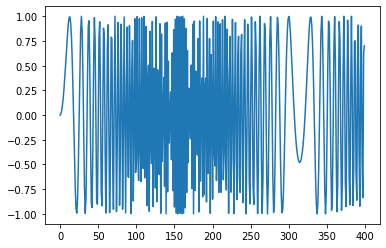

In [0]:
plt.plot(series)
plt.show()

In [0]:
#build dataset
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x= series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)

X= np.array(X).reshape(-1,T) #N*T
Y= np.array(Y)
N= len(X)
print("x.shape:",X.shape,"y.shape:",Y.shape)

x.shape: (390, 10) y.shape: (390,)


In [0]:
#auto regressive linear model

i= Input(shape=(T,))
x= Dense(1)(i)
model= Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)
#train RNN
r= model.fit(    
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data= (X[-N//2:],Y[-N//2:])
)

Epoch 1/80
7/7 [==============================] - 0s 39ms/step - loss: 1.1960 - val_loss: 1.1932
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0253 - val_loss: 1.0589
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9045 - val_loss: 0.9386
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7991 - val_loss: 0.8583
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7221 - val_loss: 0.7925
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6581 - val_loss: 0.7398
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6150 - val_loss: 0.6953
Epoch 8/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5742 - val_loss: 0.6656
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5529 - val_loss: 0.6393
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5301 - val_loss: 0.6227
Epoch 11/80
7/7 [=====================

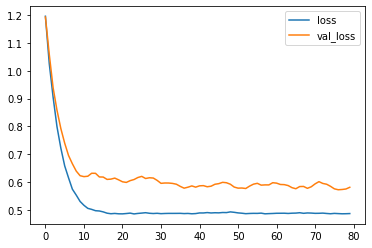

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


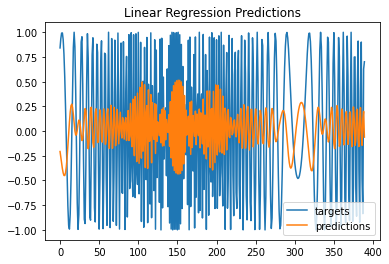

In [0]:
#one step forecast using true targets
#Note: even the one step forecast fails badly

outputs= model.predict(X)
print(outputs.shape)
predictions= outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

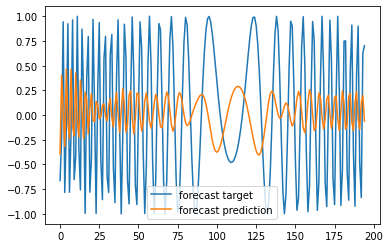

In [0]:
#one step forecast using true targets


validation_target= Y[-N//2:]
validation_predictions= []

#index of first validation input
i= -N//2

while len(validation_predictions)<len(validation_target):
  p= model.predict(X[i].reshape(1,-1))[0,0] #1*1 array =scalar
  i+=1

  #update prediction_list
  validation_predictions.append(p)

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

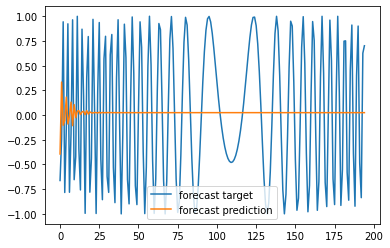

In [0]:
#Multi-Step Forecast

validation_target= Y[-N//2:]
validation_predictions= []

#last train input
last_x= X[-N//2] #1D array of length T

while len(validation_predictions)<len(validation_target):
  p= model.predict(last_x.reshape(1,-1))[0,0] 

  #update prediction_list
  validation_predictions.append(p)

  #make the new input
  last_x= np.roll(last_x,-1)
  last_x[-1]= p

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [0]:
#RNN/LSTM model
X= X.reshape(-1,T,1) #N*T*D

#RNN
i= Input(shape=(T,D))
# x= SimpleRNN(10)(i)
x= LSTM(10)(i)
x= Dense(1)(x)
model= Model(i,x)

model.compile(
    loss='mse',optimizer=Adam(lr=0.05),
)

#train the RNN
r= model.fit(
    X[:-N//2],Y[:-N//2],
    batch_size= 32,
    epochs=200,
    validation_data= (X[:-N//2],Y[:-N//2]),
)



Epoch 1/200
7/7 [==============================] - 0s 59ms/step - loss: 0.5292 - val_loss: 0.5623
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5657 - val_loss: 0.4979
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4997 - val_loss: 0.4803
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4681 - val_loss: 0.4004
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3470 - val_loss: 0.2823
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2535 - val_loss: 0.1686
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1784 - val_loss: 0.1471
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1287 - val_loss: 0.1489
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1767 - val_loss: 0.1518
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1420 - val_loss: 0.0859
Epoch 11/200
7/7 [=

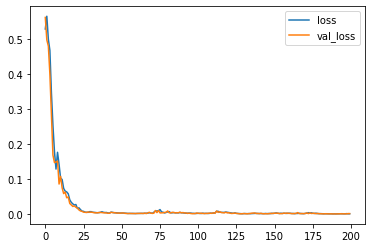

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


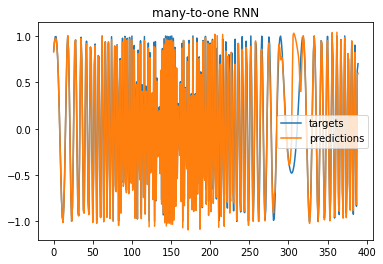

In [0]:
outputs= model.predict(X)
print(outputs.shape)
predictions= outputs[:,0]

plt.plot(Y, label= 'targets')
plt.plot(predictions,label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

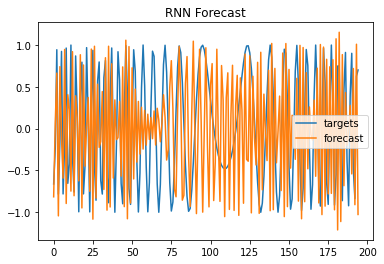

In [0]:
#multi step forecast

forecast= []
input_= X[-N//2]
while len(forecast)<len(Y[-N//2:]):
  f= model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_= np.roll(input_,-1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title('RNN Forecast')
plt.legend()
plt.show()
